 <h1><center>EDA plots</center></h1>

1. Log-Log plot of number of reviews to number of reviewers
2. Log-Log plot of number of reviews to number of products
3. Log-Log plot of number of reviews to number of helpful feedbacks
4. Plot showing % of reviwers vs overall rating

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the file
df=pd.read_csv("C:/Users/HP/Downloads/reviews_Cell_Phones_and_Accessories_full data.csv")

In [3]:
# Checking column names
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

## Data setup for plot 1

In [4]:
# Applying group by function to get the count of reviewText when grouped on reviewerID

df1 = df[['reviewerID','reviewText']].groupby(['reviewerID'])['reviewText'] \
                             .count().sort_values(ascending=False)

In [5]:
# Frequency count
df_freq=pd.DataFrame(df['reviewerID'].value_counts())

In [6]:
df_freq.to_csv("freq.csv")

In [7]:
df1_freq=pd.read_csv("freq.csv")

In [8]:
df1_freq.columns=['reviewerID','Frequency']

In [9]:
df1_freq.groupby('Frequency').count().to_csv('plot1.csv')

In [10]:
plot1=pd.read_csv('plot1.csv')

In [11]:
plot1.columns

Index(['Frequency', 'reviewerID'], dtype='object')

In [12]:
xaxis=np.log(plot1['Frequency'])

In [13]:
yaxis=np.log(plot1['reviewerID'])

### log-log plot of number of reviews to number of reviewers

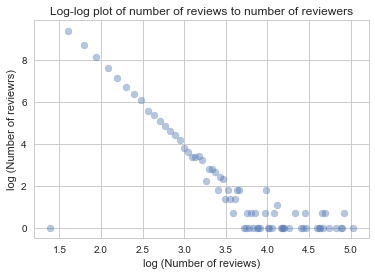

In [38]:
plt.scatter(xaxis,yaxis,alpha=0.40)
plt.xlabel("log (Number of reviews)")
plt.ylabel("log (Number of reviewrs)")
plt.title("Log-log plot of number of reviews to number of reviewers")
plt.savefig("C:/Users/HP/Documents/PRAXIS/New folder/plot1.jpg")
plt.show()

## Data setup for plot 2

In [39]:
plot2=pd.DataFrame(df.groupby('asin')['reviewText'].count()).to_csv("plot2.csv")

In [40]:
plot2=pd.read_csv("plot2.csv")

In [41]:
plot2.groupby('reviewText').count().to_csv("plot2_log.csv")

In [42]:
plot2_log=pd.read_csv("plot2_log.csv")

In [43]:
plot2_log

,reviewText,asin
0,1,1
1,4,7
2,5,1759
3,6,1244
4,7,1019
5,8,715
6,9,613
7,10,487
8,11,396
9,12,329


### Log-log plot of number of reviews to number of products

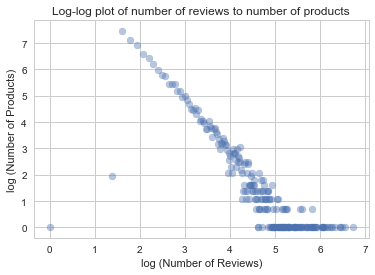

In [44]:
xaxis=np.log(plot2_log['reviewText'])
yaxis=np.log(plot2_log['asin'])
plt.xlabel("log (Number of Reviews)")
plt.ylabel("log (Number of Products)")
plt.title("Log-log plot of number of reviews to number of products")
plt.scatter(xaxis,yaxis,alpha=0.40)

plt.savefig("C:/Users/HP/Documents/PRAXIS/New folder/plot2.jpg")
plt.show()

## Data setup for plot 3

In [45]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [46]:
A=[]
temp=[]
B=[]
for i in df["helpful"]:
    d=i.strip(']')
    d=d.strip('[')
    temp.append(d.split(','))
for i in temp:
    A.append(int(i[0]))
for i in temp:
    B.append(int(i[1]))

In [47]:
df['Feedbacks']=B

In [48]:
df1=df[['Feedbacks','reviewerID']]

In [49]:
pd.DataFrame(df1.groupby('reviewerID')['Feedbacks'].count()).to_csv("feedback.csv")

In [50]:
df2=pd.read_csv("feedback.csv")

In [51]:
df2.groupby('Feedbacks')['reviewerID'].count().to_csv("plot3.csv",index=True)

In [58]:
df3=pd.read_csv('plot3.csv')

In [59]:
df3.columns

Index(['reviewIDs', 'feedbacks'], dtype='object')

### Log-log plot of number of reviews to number of helpful feedbacks

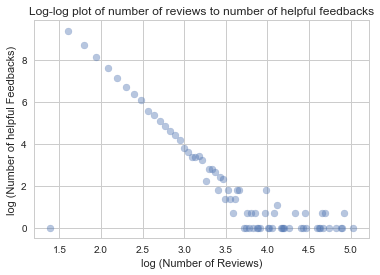

In [61]:
yaxis=np.log(df3['feedbacks'])
xaxis=np.log(df3['reviewIDs'])
plt.xlabel("log (Number of Reviews)")
plt.ylabel("log (Number of helpful Feedbacks)")
plt.title("Log-log plot of number of reviews to number of helpful feedbacks")
plt.scatter(xaxis,yaxis,alpha=0.40)
plt.savefig("C:/Users/HP/Documents/PRAXIS/New folder/plot3.jpg")
plt.show()

## Data setup for plot 4

In [62]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime', 'Feedbacks'],
      dtype='object')

In [63]:
dfo=df[['overall','reviewerID']]

In [64]:
df.groupby(['overall'])['reviewerID'].count().to_csv("overall.csv")

In [68]:
dfo=pd.read_csv("overall.csv")

In [70]:
x=dfo['overall_rating']
y=((dfo['frequency'])/np.sum(dfo['frequency']))*100

### Plot showing no. of reviwers vs overall rating

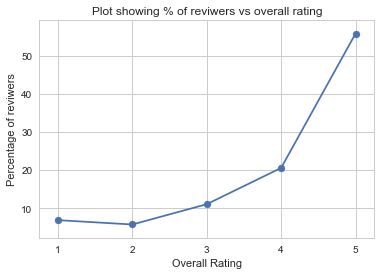

In [72]:
plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Overall Rating")
plt.ylabel("Percentage of reviwers")
plt.title ("Plot showing % of reviwers vs overall rating")
plt.savefig("C:/Users/HP/Documents/PRAXIS/New folder/plot5.jpg")
plt.show()